# Проект: Исследовательский анализ данных

В наше распоряжение были предоставлены данные сервиса Яндекс.недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов за несколько лет. Нужно научиться отпределять рыночную стоимость объектов недвижимости.
По каждой квартире на продажу досьупны два вида данных . Первые вписаны пользователем, вторые получены автоматически на основе картографических данных.
Задача - выполнить предобработку данных и изучить их, чтоы найти интересные особенности и зависимости, которые сушествуют на рынке недвижимости.

Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

1. Открываем  файл с данными и изучаем общую информацию.

1.1 Импортируем Pandas, считываем данные из файла и сохраняем их в переменную df, получаем общую информацию о датафрейме методом info()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Мои Документы\Desktop\Материалы по учебе\Исследовательский анализ данных\real_estate_data.csv", sep='\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.2 выводим первые 5 сторочек датафрейма df

In [3]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


1.3 Строим общую гистограмму для всех числовых столбцов таблицы.

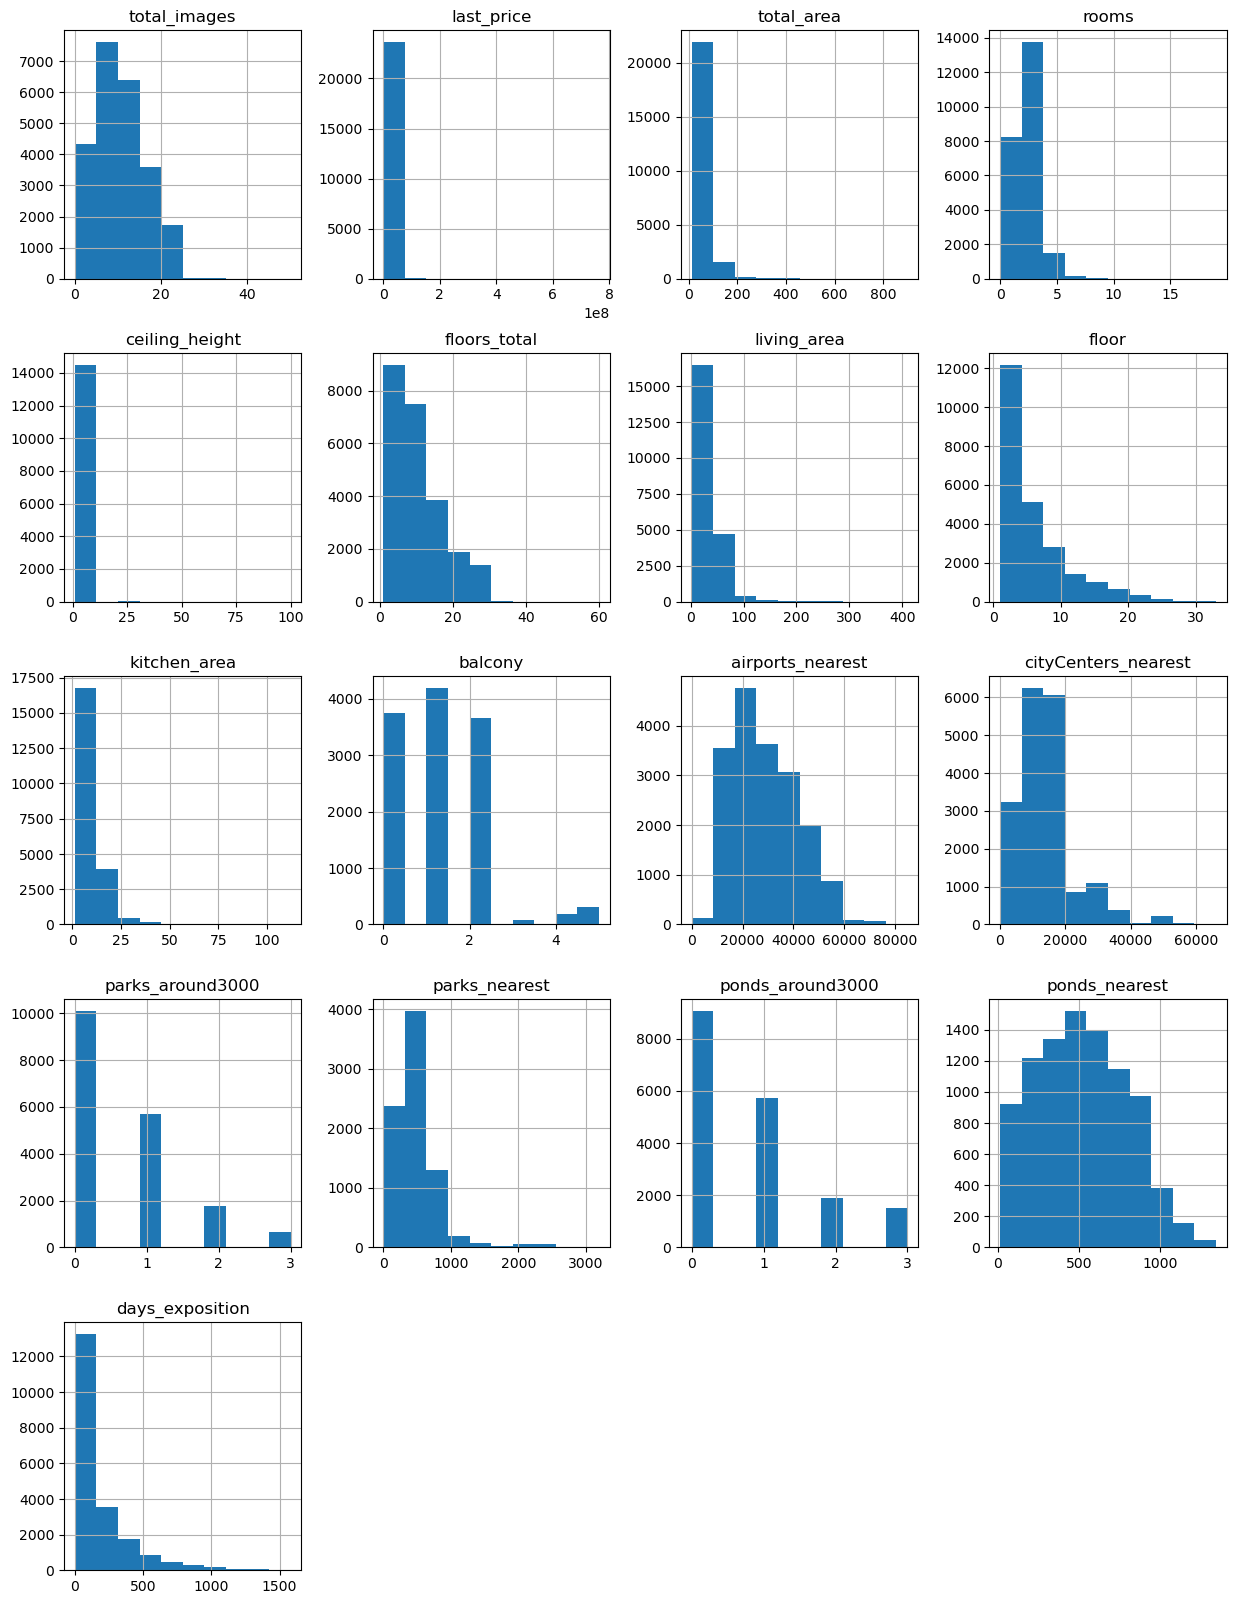

In [4]:
df.hist(figsize=(15,20));

2. Предобработка данных

2.1 Определяем количество пропущенных значений для каждого столбца

2.1.1 Определяем в каких столбцах есть пропуски

In [5]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**Выводы:**

- Пропуски в стоблце 'ceiling_height' - скороее всего поле не является обязательным для заполнения, поэтому продавцы заполняют его не всегда. Заполняют, например, когда хотят показать, что высота потолков отличается от стандартной. Так как полной уверенности в этом нет, оставляем как есть, чтобы потом не получить некорректные данные, заполнив пропуски средней высотой потолков.
- Пропуски в столбце 'floors_total' - скорее всего поле не является обязательным для заполнения, поэтому продавцы его могли пропустить и не заполнить. Оставляем как есть.
- Пропуски в столбце 'living_area' - скорее всего поле не является обязательным для заполнения, поэтому продавцы его могли пропустить и не заполнить. Оставляем как есть.
- Пропуски в столбце 'kitchen_area' - скорее всего поле не является обязательным и продавцы могли его не заполнить. Также это поле не заполняли те продавцы, где открытый тип планировки и число комнат равно 0. Оставляем как есть.
- Пропуски в столбцах cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - не заполнялись для населенных пунктов, которые не относились к Санкт-Петербургу и ближайшим к нему населенным пунктам. Помимо этого есть пропуски в столбцах parks_nearest и  ponds_nearest - там, где количество парков и ближайших водоемов равно 0. Пропуски в столбцах airports_nearest и cityCenters_nearest для Санкт-Петербурга скорре всего вознникли по техническим причинам. Оставляем как есть.
- Пропуски в столбце 'days_exposition' скорее всего обусловлены тем, что на момент выгрузки данных, объявления были еще не сняты, поэтому оставляем все как есть. 

2.1.2 Пропуски в столбце число балконов скорее всего обусловлены отсутствием балконов в квартире (если продавец не указал число балконов, то скорее всего их в квартире нет). Поэтому заменяем значения пропусков на 0. Проверяем не осталось ли пропусков в столбце 'balcony'

In [6]:
df.loc[df['balcony'].isna(), 'balcony'] = 0
print(df['balcony'].isna().sum())

0


2.1.3 Пропуски в столбце 'is_apartment' скорее всего обусловлены тем, что квартиры не являются аппартаментами (продавецы не заполнил данное поле, если это не аппартамены), поэтому пропуски зменяем на False.

In [7]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
print(df['is_apartment'].isna().sum())

0


2.1.4 Пропуски в столбце 'locality_name' - скорее всего здесь произошел сбой при подгрузке информации, т.к. далее как правило есть географические данные по расстояни от центра и до аэропорта. Заполним пропуски - Неизвестный населенный пункт

In [8]:
df.loc[df['locality_name'].isna(), 'locality_name'] = 'Неизвестный населенный пункт'
print(df['locality_name'].isna().sum())

0


2.2 Рассмотрим тип данных в каждом столбце и найдем, столбцы в которых нужно изменить тип данных.

2.2.1 Изменяем тип данных в столбце 'is_apartment' на булевой (так как только два жзначения до и нет) методом astype(), в датафрейме стоит тип данных object 

In [9]:
df['is_apartment'] = df['is_apartment'].astype('bool')

2.2.2 Изменяем тип данный в столбце 'first_day_exposition' на datetime методом to_datetime()

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

2.2.3 Проверяем тип данных в столбцах

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

2.3 Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты

2.3.1 Определяем уникальные значения в столбце 'locality_name'

In [12]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

2.3.2 Добавляем в таблицу новый столбец 'locality_name_no_duplicates' и заменяем в названиях населенныхх пунктов поселок на посёлок, проверяем дубликаты

In [13]:
df['locality_name_no_duplicates'] = df['locality_name'].replace('поселок', 'посёлок', regex=True)
print(df['locality_name_no_duplicates'].value_counts())

Санкт-Петербург         15721
посёлок Мурино            556
посёлок Шушары            440
Всеволожск                398
Пушкин                    369
                        ...  
посёлок Алексеевка          1
посёлок Белоостров          1
деревня Пельгора            1
посёлок Каложицы            1
посёлок Дзержинского        1
Name: locality_name_no_duplicates, Length: 331, dtype: int64


2.3.3 В столбце 'locality_name_no_duplicates' заменяем дубликаты "поселок Рябово" и "поселок городского типа Рябово", заменяем в названиях населенных пунктов 'городской посёлок' на 'посёлок городского типа', проверяем дубликаты.

In [14]:
def change_locality2(row):
    if 'посёлок Рябово' in row:
        return 'посёлок городского типа Рябово'
    if 'городской посёлок' in row:
        return row.replace('городской посёлок','посёлок городского типа')
    else:
        return row
df['locality_name_no_duplicates'] = df['locality_name_no_duplicates'].apply(change_locality2) 
print(df['locality_name_no_duplicates'].value_counts())  

Санкт-Петербург                    15721
посёлок Мурино                       556
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
посёлок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: locality_name_no_duplicates, Length: 323, dtype: int64


In [15]:
print(df.duplicated().sum())

0


2.4 Устранение редких и выбивающихся значений

2.4.1 Воспользуемся методом describe для получения списка характерных значений по столбцам. Из полученных данных видно, что есть анамальные значения в столбцах ceiling_height, floors_total, также надо посмотреть более детально данные по квартирам с большой площадью в соотношении с данными других столбцов. Также посмотреть данные по большим значениям days_exposition. 

In [16]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


2.4.2 Убираем анамальные значения в столбце ceiling_height

In [17]:
print(df.query('ceiling_height < 2 or ceiling_height > 5 ')['ceiling_height'].unique())

[ 25.     5.2    5.3    5.6   32.     8.    27.    24.    26.     1.2
   8.3    5.5   14.     1.75  20.     6.    22.6    5.8   27.5   10.3
   1.   100.  ]


In [18]:
print(df.query('ceiling_height==1 or ceiling_height==1.2 or ceiling_height==100 or ceiling_height==14 or ceiling_height==10.3'))

       total_images  last_price  total_area first_day_exposition  rooms  \
5712              5   1500000.0        42.8           2017-08-14      2   
15061            19   5600000.0        56.4           2018-05-11      2   
22309            20   5300000.0        45.0           2017-09-30      1   
22590            16   6000000.0        55.0           2018-10-31      2   
22869             0  15000000.0        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5712              1.2           2.0         27.5      1         False  ...   
15061            14.0          14.0         32.4      5         False  ...   
22309            10.3          16.0         15.5     15         False  ...   
22590             1.0          12.0         32.4      7         False  ...   
22869           100.0           5.0         14.0      5          True  ...   

       balcony          locality_name  airports_nearest  cityCenters_nearest  \


Убираем из таблицы выдающиеся значения, которые скорее всего ошибочны (1, 1.2, 14, 10.3, 100),  и замещаем ошибочные значения на правильные 

In [19]:
df = df.query('ceiling_height != 1. and ceiling_height != 1.2 and ceiling_height != 14  and ceiling_height != 10.3 and ceiling_height != 100')

In [20]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = (df.loc[df['ceiling_height'] >= 20, 'ceiling_height'])/10

2.4.3 Убираем анамальные значения в столбце floors_total. Не нашла, что в Кронштадте и Санкт-Петербурге есть жилые здания выше 40 этажей, поэтому удалем эти данные

In [21]:
display(df.query('floors_total >40'))
df = df.query('floors_total != 52 and floors_total != 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,...,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,...,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург


2.4.4 Смотрим квартиры с площадью более 300 м2 и площадью меньше 30 м2

In [22]:
display(df.query('total_area > 300'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,...,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,Санкт-Петербург
581,20,65000000.0,365.0,2019-03-18,7,2.90,7.0,NaN,7,False,...,0.0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,Санкт-Петербург
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,...,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,Санкт-Петербург
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,False,...,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,Санкт-Петербург
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20820,7,73900000.0,342.0,2015-06-18,5,NaN,4.0,187.0,2,False,...,0.0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,377.0,Санкт-Петербург
21955,19,130000000.0,431.0,2017-10-02,7,3.70,8.0,220.0,5,False,...,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0,Санкт-Петербург
21990,20,68000000.0,373.1,2018-09-08,8,NaN,8.0,176.2,8,False,...,0.0,Санкт-Петербург,37965.0,7873.0,1.0,562.0,3.0,691.0,234.0,Санкт-Петербург
22131,14,27000000.0,422.2,2018-10-18,5,2.70,13.0,NaN,11,False,...,0.0,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург


In [23]:
display(df.query('total_area < 30'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates
94,3,3500000.0,29.5,2019-04-26,1,2.5,5.0,15.60,2,False,...,1.0,Санкт-Петербург,12921.0,7303.0,0.0,NaN,0.0,NaN,4.0,Санкт-Петербург
114,5,4000000.0,21.4,2019-02-07,1,2.9,8.0,8.30,7,False,...,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN,Санкт-Петербург
144,1,2450000.0,27.0,2017-03-30,0,NaN,24.0,15.50,2,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,посёлок Мурино
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,Санкт-Петербург
296,4,1690000.0,28.0,2017-08-09,1,NaN,5.0,17.00,1,False,...,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Выборг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23579,7,2350000.0,24.8,2018-06-07,1,NaN,10.0,18.00,2,False,...,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0,Кудрово
23592,10,1450000.0,29.0,2017-11-11,0,NaN,9.0,18.00,8,False,...,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,Никольское
23610,16,2950000.0,29.0,2018-08-04,1,2.5,9.0,18.60,1,False,...,0.0,Санкт-Петербург,30081.0,12942.0,0.0,NaN,0.0,NaN,107.0,Санкт-Петербург
23637,8,2350000.0,26.0,2018-06-26,0,NaN,25.0,17.00,4,False,...,2.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,207.0,посёлок Бугры


Посмотрев данные по квартирам с большой и маленькой площадью (в соотношении с данными в других столбцах), данные выглядят логично, но это слишком большие более 300 м2 и маленькие квартиры менее 30 м2 являются нетипичными, поэтому удаляем их.

In [24]:
df = df.query('total_area < 300 and total_area >= 30')
print(len(df.query('total_area < 300 and total_area >= 30')))

22937


2.4.5. Смотрим данные по столбцу со стоимостью квартир (как они изменились, после удаления выбросов по площади)

In [25]:
print(df['last_price'].describe())

count    2.293700e+04
mean     6.410887e+06
std      7.844932e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      3.300000e+08
Name: last_price, dtype: float64


Убираем квартиры стоимость, которых более 70000000 и менее 1000000.

In [26]:
df = df.query('last_price < 70000000 and last_price >= 1000000')
print(len(df.query('last_price < 70000000 and last_price >= 1000000')))

22683


2.4.6 Смотрим данные по столбцу с количеством комнат (как они изменились, после удаления выбросов по площади и цене). Смотрим данные по квартирам с количеством комнат более 7 и числом комнат 0. 

In [27]:
print(df['rooms'].describe())

count    22683.000000
mean         2.096195
std          1.030402
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


In [28]:
display(df.query('rooms > 7 or rooms == 0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,посёлок Парголово
648,3,17500000.0,183.70,2018-07-01,11,3.40,7.0,138.80,7,False,...,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
813,7,16500000.0,229.00,2016-02-25,8,NaN,6.0,160.00,5,False,...,0.0,Санкт-Петербург,23968.0,4536.0,1.0,243.0,0.0,NaN,806.0,Санкт-Петербург
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,...,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,посёлок Новый Свет
1174,3,3900000.0,32.00,2016-10-18,0,2.70,24.0,18.00,2,False,...,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,Санкт-Петербург
1528,8,1950000.0,31.00,2019-01-29,0,NaN,18.0,18.00,11,False,...,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Никольское
1600,11,2550000.0,30.00,2017-11-10,0,2.75,23.0,15.90,11,False,...,2.0,Санкт-Петербург,21928.0,17256.0,0.0,NaN,1.0,429.0,19.0,Санкт-Петербург
3147,7,2170000.0,31.00,2017-12-30,0,2.60,12.0,NaN,12,False,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0,Тосно
3458,6,7400000.0,73.60,2017-05-18,0,NaN,3.0,50.00,1,False,...,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,Санкт-Петербург
4149,6,23000000.0,272.60,2018-01-11,10,3.14,7.0,145.90,7,False,...,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,Санкт-Петербург


Удаляем квартиры с числом комнат более 7.

In [29]:
df = df.query('rooms < 7')
print(len(df.query('rooms < 7')))

22623


2.4.7 Смотри данные в столбце - площадь кухни

In [30]:
print(df['kitchen_area'].describe())

count    20781.000000
mean        10.527287
std          5.491812
min          2.000000
25%          7.100000
50%          9.300000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64


Удаляем данные с маленькой поощадью кухни менее 4 м и большой площадью кухни >20

In [31]:
df = df.query('kitchen_area.isna() or (kitchen_area >= 4 and kitchen_area < 20)')
print(len(df.query('kitchen_area.isna() or (kitchen_area >= 4 and kitchen_area < 20)')))

21559


2.4.8 Смотри данные в столбце - жилая площадь

In [32]:
print(df['living_area'].describe())

count    19840.000000
mean        33.033237
std         16.679001
min          2.000000
25%         18.900000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64


Удаляем данные с маленькой с маленькой жилой площадью (менее 12 м2)

In [33]:
df = df.query('living_area.isna() or living_area >12')
print(len(df.query('living_area.isna() or living_area >12')))

21457


2.4.9. Смотрим квартиры с догим сроком продажи.

In [34]:
display(df.query('days_exposition > 1400'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8.0,42.70,7,False,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,Санкт-Петербург
2941,3,10090000.0,71.90,2015-02-02,2,NaN,10.0,34.10,9,False,...,2.0,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1458.0,Санкт-Петербург
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5.0,45.10,4,False,...,0.0,Санкт-Петербург,20182.0,1724.0,3.0,606.0,3.0,453.0,1477.0,Санкт-Петербург
6006,4,4400000.0,38.63,2015-02-03,1,2.85,25.0,15.00,6,False,...,2.0,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,1452.0,посёлок Парголово
6691,3,4400000.0,42.98,2014-12-12,1,NaN,5.0,18.72,1,False,...,0.0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0,Пушкин
6726,6,11995000.0,83.82,2014-11-27,2,2.73,11.0,42.31,1,False,...,0.0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1406.0,Санкт-Петербург
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17.0,44.00,9,False,...,0.0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,Санкт-Петербург
9555,11,9950000.0,61.20,2015-04-06,2,3.17,7.0,39.70,2,False,...,0.0,Санкт-Петербург,9740.0,10123.0,1.0,114.0,0.0,NaN,1434.0,Санкт-Петербург
11955,4,11400000.0,76.00,2014-12-09,2,NaN,9.0,36.00,3,False,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1484.0,Санкт-Петербург
11985,1,15104000.0,118.00,2015-05-19,3,3.10,16.0,64.32,5,False,...,0.0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,1417.0,Санкт-Петербург


Срок публикации объявлений 2014-15, поэтому данные по срокам продажи выглядят логично. 

Смотрим описание столбцов таблицы, после удаления аномальных и выдающихся значений

In [35]:
display(df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21457.000000,2.145700e+04,21457.000000,21457.000000,13219.000000,21391.000000,19738.000000,21457.000000,19631.000000,21457.000000,16515.000000,16535.000000,16536.000000,7199.000000,16536.000000,8115.000000,18684.000000
mean,9.822948,5.695349e+06,57.491866,2.046698,2.709763,10.692207,33.149941,5.873887,9.578613,0.599292,28875.940781,14507.394436,0.590832,491.834283,0.743227,524.680715,178.972276
std,5.636560,4.343122e+06,24.605006,0.959353,0.271206,6.526013,16.642131,4.843836,3.121338,0.960991,12775.184956,8586.051853,0.785935,339.802188,0.919820,276.861657,218.234311
min,0.000000,1.000000e+06,30.000000,0.000000,1.750000,1.000000,12.080000,1.000000,4.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000e+06,40.800000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,18406.500000,9815.000000,0.000000,290.000000,0.000000,303.500000,45.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26890.000000,13268.000000,0.000000,456.000000,0.000000,509.000000,94.000000
75%,14.000000,6.500000e+06,67.400000,3.000000,2.800000,16.000000,42.000000,8.000000,11.200000,1.000000,37434.000000,16454.000000,1.000000,614.000000,1.000000,733.000000,228.000000
max,50.000000,6.800000e+07,295.000000,6.000000,8.300000,37.000000,200.000000,33.000000,19.940000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


3. Добавление в таблицу новых столбцов

3.1 Добавляем в таблицу столбец стоимость квадратного метра 'price_metre' путем деления значения цены квартиры на общую площадь квартиры

In [36]:
df['price_metre'] = df['last_price']/df['total_area']

3.2 Добавляем столбец с днем недели публикации - day_exposition_weekday

In [37]:
df['day_exposition_weekday'] = df['first_day_exposition'].dt.weekday


3.3 Добавляем столбец с месяцем публикации объявления 'day_exposition_month'

In [38]:
df['day_exposition_month'] = df['first_day_exposition'].dt.month

3.4 Добавляем столбеw с годом публикации объявления 'day_exposition_year'

In [39]:
df['day_exposition_year'] = df['first_day_exposition'].dt.year

3.5 Добавляем тип этажа квартиры (значения - первый, последний, другой). Если нет информации об общем количестве этажей, 
пишем нет категории. Создаем функцию для классификации квартир по типам и используем метод apply() ко всему датафрейму.Проверяем уникальные значения

In [40]:
def floors_group (row):
    if row['floor'] == 1:
        return 'первый'
    elif row ['floor'] >1 and row['floor']==row['floors_total']:
        return 'последний'
    elif row ['floor'] >1 and row['floor']<row['floors_total']:
        return 'другой'
    else:
        return 'нет категории'
        
df['group_floors'] = df.apply(floors_group, axis=1)      
print(df['group_floors'].unique())        

['первый' 'другой' 'последний' 'нет категории']


3.6 Добавляем столбец с расстоянием до центра города в киллометрах 'cityCenters_nearest_km' и округляем до целых значений

In [41]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).round(decimals=0)  

In [42]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_no_duplicates,price_metre,day_exposition_weekday,day_exposition_month,day_exposition_year,group_floors,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,посёлок Шушары,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,55.0,посёлок городского типа Янино-1,95065.789474,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,другой,12.0


4. Исследовательский анализ данных

4.1. Строим отдельные гистограммы для каждого из параметров.

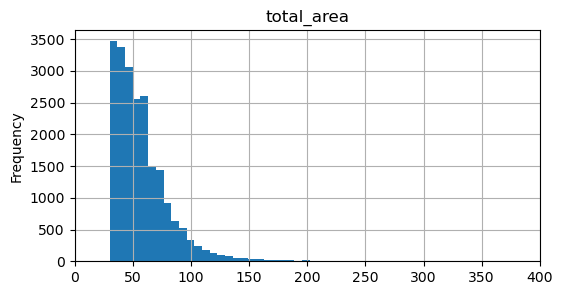

In [43]:
df['total_area'].plot(kind='hist', bins=40, title ='total_area', figsize = (6,3), grid=True, xlim=(0,400));

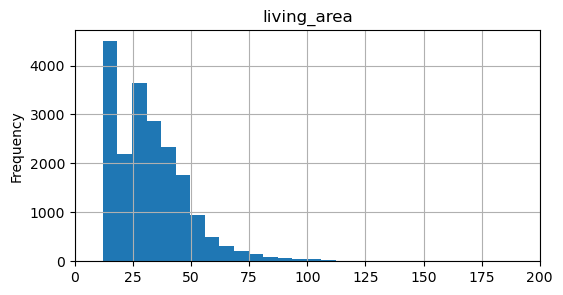

In [44]:
df['living_area'].plot(kind='hist',  bins=30, title ='living_area', figsize = (6,3), 
                                                        grid=True, xlim=(0,200));

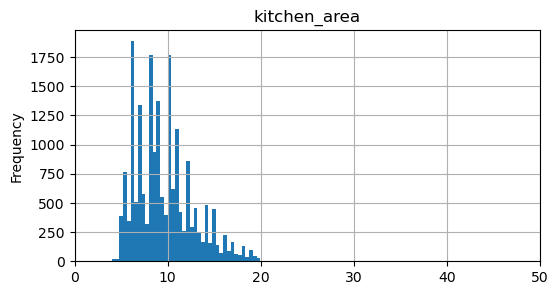

In [45]:
df['kitchen_area'].plot(kind='hist',  bins=40, title ='kitchen_area', figsize = (6,3), 
                                                        grid=True, xlim=(0,50));

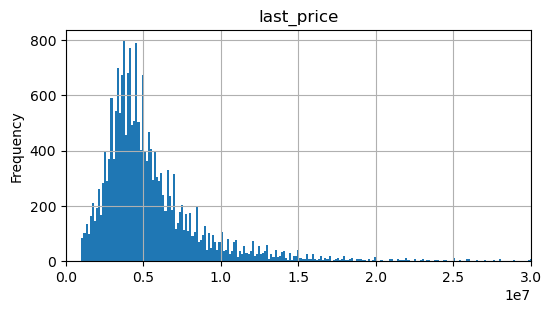

In [46]:
df['last_price'].plot(kind='hist', bins=500, title ='last_price', figsize = (6,3), grid=True, xlim=(0,30000000)); 

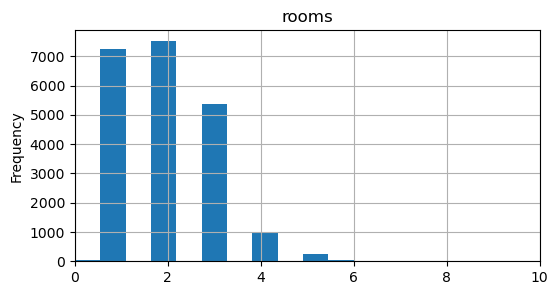

In [47]:
df['rooms'].plot(kind='hist', bins=11, title ='rooms', figsize = (6,3), grid=True, xlim=(0,10));

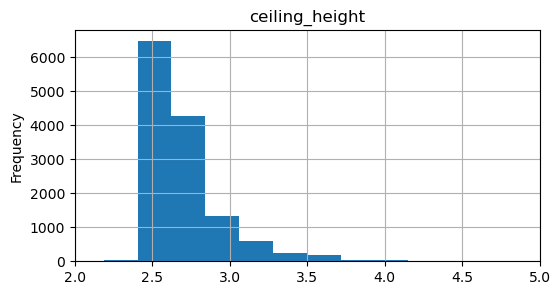

In [48]:
df['ceiling_height'].plot(kind='hist',  bins=30, title ='ceiling_height', 
                                                              figsize = (6,3), grid=True, xlim=(2,5));

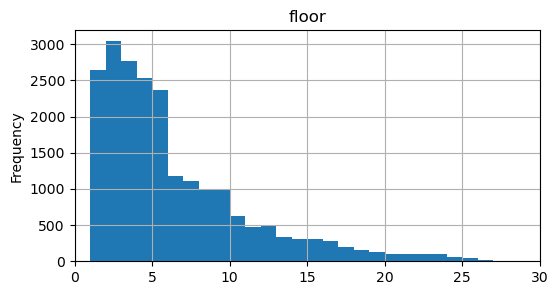

In [49]:
df['floor'].plot(kind='hist', bins=32, title ='floor', figsize = (6,3), grid=True, xlim=(0,30));


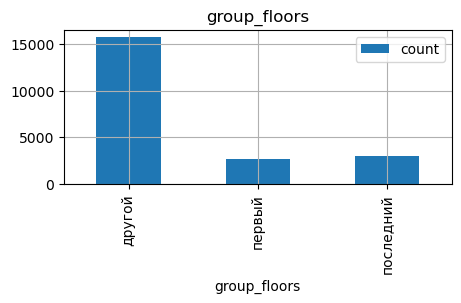

In [50]:
df_floors_group = (
    df
    .query('group_floors != "нет категории"')
    .pivot_table(index = 'group_floors', values='floor',aggfunc='count')
)    
df_floors_group.columns = ['count']
df_floors_group.plot(kind='bar', y='count',  title ='group_floors', figsize=(5,2), grid=True);


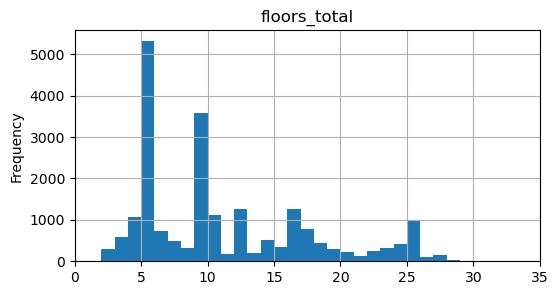

In [51]:
df['floors_total'].plot(kind='hist',  bins=36, title ='floors_total', figsize = (6,3), 
                                                        grid=True, xlim=(0,35));

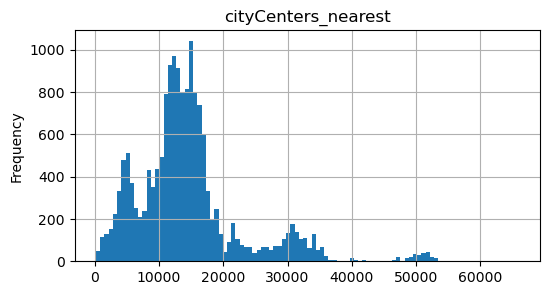

In [52]:
df['cityCenters_nearest'].plot(kind='hist',  bins=100, title ='cityCenters_nearest', 
                                                              figsize = (6,3), grid=True);

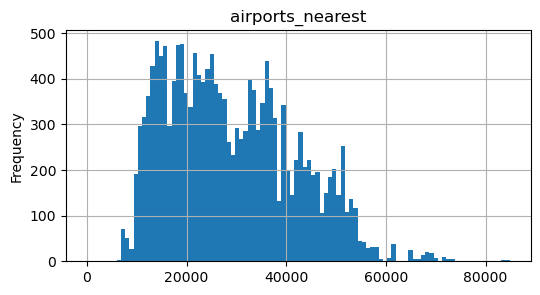

In [53]:
df['airports_nearest'].plot(kind='hist',  bins=100, title ='airports_nearest', 
                                                              figsize = (6,3), grid=True);

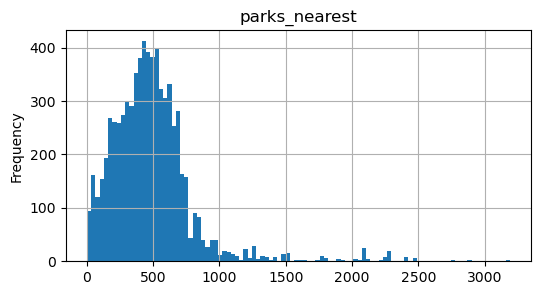

In [54]:
df['parks_nearest'].plot(kind='hist',  bins=100, title ='parks_nearest', 
                                                              figsize = (6,3), grid=True);

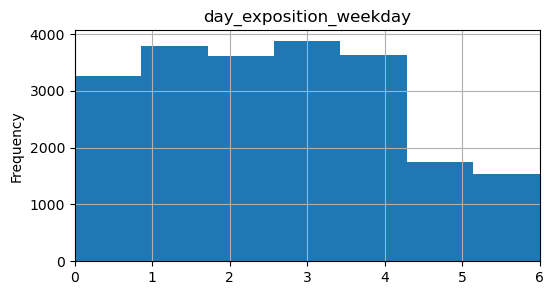

In [55]:
df['day_exposition_weekday'].plot(kind='hist', bins=7, title ='day_exposition_weekday', figsize = (6,3), grid=True, 
                                  xlim=(0,6));

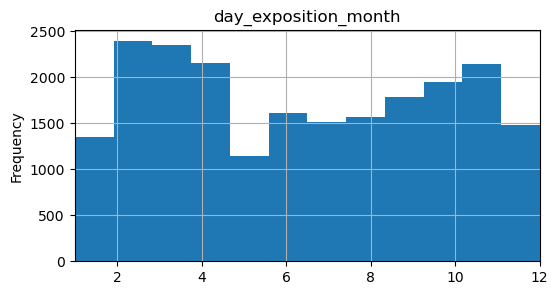

In [56]:
df['day_exposition_month'].plot(kind='hist', bins=12, title ='day_exposition_month', figsize = (6,3), grid=True, 
                                  xlim=(1,12));

В целом все графики выглядят логично. Из данных гистограммы видно:
- Общая площать большинства продаваемых квартир находится в диапазоне  до 100 м2, наибольшее число предложений по квартирам с площадью около 50 м2, далее длинный хвост из небольшого количества предложений квартир с большой площатью.
- Жилая площаль большинства продаваемых квартир находится в диапазоне от 20 до 55 м2, есть длинный хвост из квартир с жилой площадью более 55 м2 . Пик предложений приходится на жилую площать около 25 м2. 
- Наибольше число продоваемых квартир с площадью кухни около 8-9 метров, площадь кухни большинства продаваемых квартир лежит в районе 6 -12 м2, далее длиный хвост из квартир с большой площадью кухни.
- Наибольшее число продаваемых квартир в районе 4 - 7 млн. 
- Наибольшее число продоваемых квартирс 2-3 комнатами, также достатчно много квартир открытого типа планировки и однокомнатных. Гараздо мень предложений квартир 4 комнаты и более. Что вполне соответсвует реальности.  
- Наибольшее число предложений с высотой потолка 2.5 - 2.6 м.
- Наибольшее число предложений о продаже квартир, этаж которых не относится к первому и последнему, что также вполне соответсвут реальности.
- Наибольшее количество предложений по продаже квартир в 5 и 9 этажных домах.
- наиболее активно размещат объявления в тьечение рабочей недели, реже в выходные.
- Наибольшее количество объявлений размещают в феврале-апреле, а следующий пик в сентябре -ноябре.  
- Наибольшее число квартир продается на в районе 10-17 км от центра города.
- Наибольшее число предложений с расстоянием до ближайшего парка в районе 400-500 м.
- Гисторгамма расстояния до аэропорта имеет несколько пиков. Чаще всего продают квартиры на расстоянии около 18-40 км. 

4.2 Изучаем как быстро продавались квартиры (столбец 'days_exposition'). Строим гистограмму и считаем среднее и медиану.

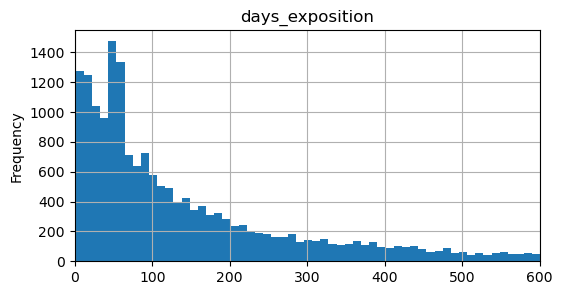

In [57]:
df['days_exposition'].plot(kind='hist',  bins=150, title ='days_exposition', figsize = (6,3), 
                                                        grid=True, xlim=(0,600));

In [58]:
print(df.query('not(days_exposition.isna())')['days_exposition'].mean())

178.97227574395205


In [59]:
print(df.query('not(days_exposition.isna())')['days_exposition'].median())

94.0


In [60]:
print(df['days_exposition'].describe())

count    18684.000000
mean       178.972276
std        218.234311
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64


Среднее воремя продажи составляет 179 дней а медиана 94 дней, такое отличе обусловлено влиянием на среднее значение долгих проодаж. Долгие продажи начаниются в районе 230 дней. Быстрые прожажи до 40-45 дней.

4.3 Изучаем какие факторы больше всего влияют на стоимость

Изучаем зависимость общей площади  и стоимости. Расчитываем коэффициент корреляции методом corr(), группируем данные по общей площади с помощью сводной таблицы методом pivot_table(), строим диаграмму рассеивания.

0.7424687068378133


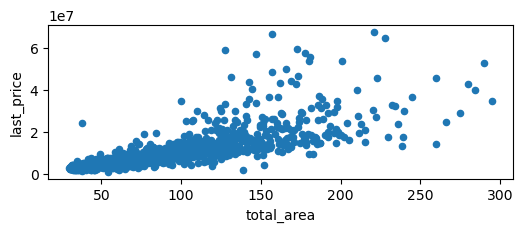

In [61]:
print(df['total_area'].corr(df['last_price']))
df_total_area = df.pivot_table(index='total_area', values='last_price',aggfunc='median')
df_total_area = df_total_area.reset_index()
df_total_area.plot(x='total_area', y='last_price', kind='scatter', figsize= (6,2));

Изучаем зависимость жилой площади и стоимости. 

0.6589745864527956


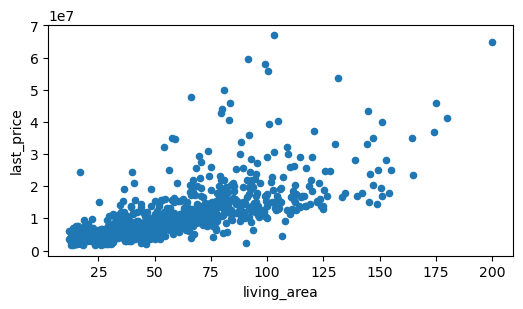

In [62]:
print(df.query('not(living_area.isna())')['living_area'].corr(df['last_price']))
df_living_area = df.query('not(living_area.isna())').pivot_table(index='living_area', values='last_price', aggfunc='median')
df_living_area = df_living_area.reset_index()
df_living_area.plot(x='living_area', y='last_price', kind='scatter', figsize= (6,3));

Изучаем зависимость площади кухни и стоимости. 

0.48585652867597234
              last_price
kitchen_area            
4.00           3000000.0
4.10           3155000.0
4.20           2888000.0
4.30           2400000.0
4.40           1800000.0
...                  ...
19.70          8775000.0
19.80         11999500.0
19.90          8250000.0
19.92         11900000.0
19.94          6170000.0

[665 rows x 1 columns]


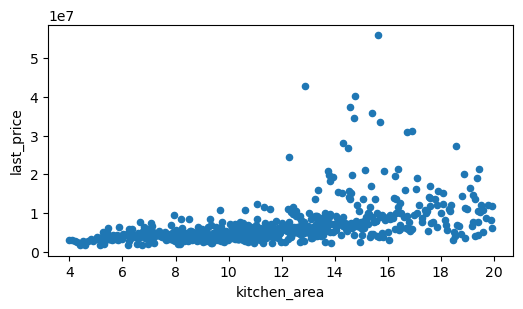

In [63]:
print(df.query('not(kitchen_area.isna())')['kitchen_area'].corr(df['last_price']))
df_kitchen_area = df.query('not(kitchen_area.isna())').pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
print (df_kitchen_area)

df_kitchen_area = df_kitchen_area.reset_index()
df_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', figsize= (6,3));

Изучаем зависимость количества комнат и стоимости. 

0.4445873804645294
   rooms  last_price
0      0   3375000.0
1      1   3650000.0
2      2   4700000.0
3      3   5990000.0
4      4   8300000.0
5      5  12400000.0
6      6  13450000.0


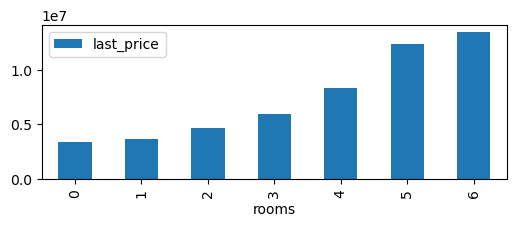

In [64]:
print(df['rooms'].corr(df['last_price']))
df_rooms = df.pivot_table(index='rooms', values='last_price', aggfunc='median')
df_rooms = df_rooms.reset_index()
print(df_rooms)
df_rooms.plot(x='rooms', y='last_price', kind='bar', figsize= (6,2));

Изучаем зависимость этажа и стоимости. 

  group_floors  last_price
0       другой   4800000.0
1       первый   3990000.0
2    последний   4250000.0


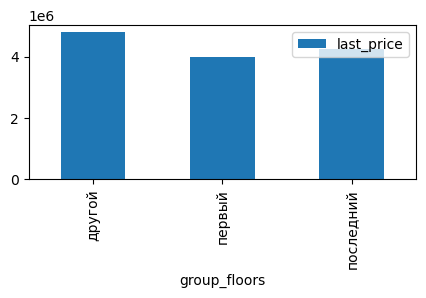

In [65]:
df_group_floors = df.query('group_floors != "нет категории"').pivot_table(index='group_floors', values='last_price', aggfunc='median')
df_group_floors = df_group_floors.reset_index()
print(df_group_floors)
df_group_floors.plot(x='group_floors', y='last_price', kind='bar', figsize= (5,2));

Изучаем зависимость дня размещения и стоимости. 

-0.013598886872580212
   day_exposition_weekday  last_price
0                       0   4600000.0
1                       1   4700000.0
2                       2   4675000.0
3                       3   4600000.0
4                       4   4550000.0
5                       5   4580000.0
6                       6   4500000.0


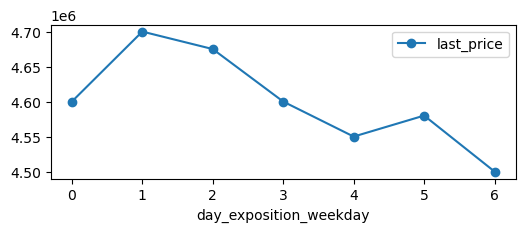

In [66]:
print(df['day_exposition_weekday'].corr(df['last_price']))
df_weekday = df.pivot_table(index='day_exposition_weekday', values='last_price', aggfunc='median')
df_weekday = df_weekday.reset_index()
print(df_weekday)
df_weekday.plot(x='day_exposition_weekday', y='last_price', style='o-', figsize= (6,2));

Изучаем зависимость месяца размещения и стоимости.

0.0004988062289829627
    day_exposition_month  last_price
0                      1   4600000.0
1                      2   4600000.0
2                      3   4650000.0
3                      4   4779507.0
4                      5   4500000.0
5                      6   4400000.0
6                      7   4600000.0
7                      8   4600000.0
8                      9   4650000.0
9                     10   4550000.0
10                    11   4650000.0
11                    12   4600000.0


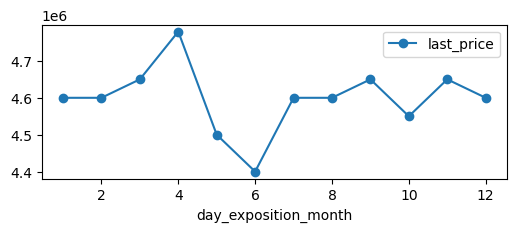

In [67]:
print(df['day_exposition_month'].corr(df['last_price']))
df_month = df.pivot_table(index='day_exposition_month', values='last_price', aggfunc='median')
df_month = df_month.reset_index()
print(df_month)
df_month.plot(x='day_exposition_month', y='last_price', style='o-', figsize= (6,2));

Изучаем зависимость года размещения и стоимости.

-0.03675313499368253
   day_exposition_year  last_price
0                 2014   6200000.0
1                 2015   5144000.0
2                 2016   4500000.0
3                 2017   4500000.0
4                 2018   4590000.0
5                 2019   5000000.0


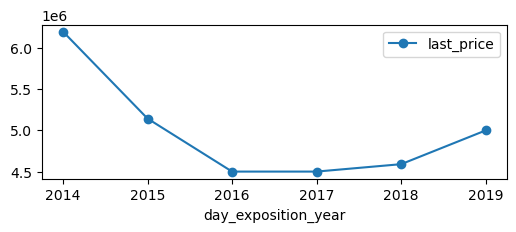

In [68]:
print(df['day_exposition_year'].corr(df['last_price']))
df_year = df.pivot_table(index='day_exposition_year', values='last_price', aggfunc='median')
df_year = df_year.reset_index()
print(df_year)
df_year.plot(x='day_exposition_year', y='last_price', style='o-', figsize= (6,2));

Из рассматриваемых параметров стоимость квартиры в большей степени зависит от общей пллощади, эта зависимость практически прямая в зоне до 120 м2, затем зависимость не столь выражена, особено в области квартир с большой площадью. Коэффициент корреляции = 0.74. Похожая картина наблюдается в зависимости стоимости от жилой площади, но здесь коэффициент корреляции ниже (0.65).  Еще в меньшей степени стоимость квартиры зависит от площади кухни (0,48), здеь также наблюдается практически прямая зависимость при размере кухни до 12-15 метров, а потом появлятся разбросы. Общая зависимость если кухня больше, стоимость выше есть, но скорре всего она обусловлена не только данным фактором. Зависимость между стоимостью и количеством комнат есть, чем больше комнат тем выше стоимость квартир. Нр зависимость сложная и скорее всего зависит от ряда лургих факторов. Цена зависит от этажа, наиболее дешовые квартиры на первом этаже, квартиры, которые не находяться на первом и последнем этаже стоят дороже. Стоимость квартир не сильно зависит от дня и месяца публикации объявления (максимальные коллебания медианной стоимости квартир  в зависимости от месяца около 400 000 руб, а от дня недели около 200000 руб), но есть колебаня стоимости в зависимости от кода публикации,в 2014 году медианная стоимость квартир выше, чем в других.

4.4 Считаем среднюю цену одного квадратного метра в 10 неселеннных пунктах с наибольшим числом объявлений. Выделите населенные пункты с самой высокой и низкой стоимостью квадратного метра. 

Группируеми таблицу по назвнию населенного поселка с ппомощью pitot_table и функций mean() и count(), записываем в переменную df_group_locality_name, переименовываем столбцы, сортируем по убыванию и выводим 10 значений.

In [69]:
df_group_locality_name = (
    df
    .query('locality_name_no_duplicates != "неизвестный населенный пункт"')
    .pivot_table(index='locality_name_no_duplicates', values='price_metre', aggfunc=['mean','count'])  
)
df_group_locality_name.columns = ['mean_price_metre', 'count']
print(df_group_locality_name.sort_values (by='count', ascending = False).head(10))

                             mean_price_metre  count
locality_name_no_duplicates                         
Санкт-Петербург                 110129.823101  14202
посёлок Мурино                   84002.068481    469
посёлок Шушары                   77508.487568    414
Всеволожск                       68377.632191    378
Пушкин                          101440.787093    336
Колпино                          75192.202044    327
посёлок Парголово                89866.161644    307
Гатчина                          68792.574426    299
деревня Кудрово                  92350.129513    251
Выборг                           57875.324270    215


In [70]:
print(df_group_locality_name.sort_values (by='count', ascending = False).head(10).min()) 
print(df_group_locality_name.sort_values (by='count', ascending = False).head(10).max()) 

mean_price_metre    57875.32427
count                 215.00000
dtype: float64
mean_price_metre    110129.823101
count                14202.000000
dtype: float64


4.5 Выделяем квартиры в Санкт-Петербурге с помощью столбца 'locality_name_no_duplicates' и высчитываем среднюю цену каждого километра. Для этого группируем таблицу по cityCenters_nearest_km и считаем средную стоимость.

    cityCenters_nearest_km  mean_price_metre
0                      0.0     173313.857403
1                      1.0     147264.260517
2                      2.0     136986.812713
3                      3.0     116968.523277
4                      4.0     123270.301397
5                      5.0     131337.975600
6                      6.0     135363.135633
7                      7.0     144620.896100
8                      8.0     121254.738742
9                      9.0     111298.652787
10                    10.0     110839.948780
11                    11.0     107257.498726
12                    12.0     106817.973301
13                    13.0     107051.226654
14                    14.0     103308.218018
15                    15.0     102942.081605
16                    16.0      99460.465680
17                    17.0      96056.464265
18                    18.0      96034.668882
19                    19.0      97871.689819
20                    20.0      99759.485327
21        

<AxesSubplot:title={'center':'Санкт-Петербург'}, xlabel='cityCenters_nearest_km'>

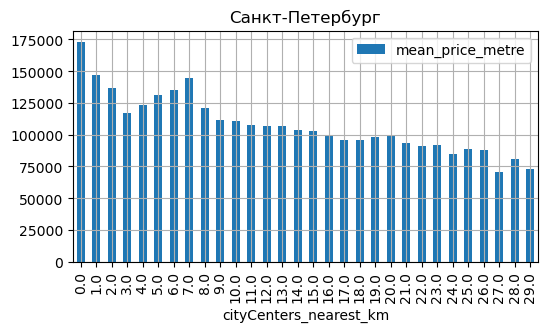

In [71]:
df_group_sp = (
    df
    .query('locality_name_no_duplicates == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_metre')
)  

df_group_sp.columns = ['mean_price_metre']
df_group_sp = df_group_sp.reset_index()
print(df_group_sp)
df_group_sp.plot(x='cityCenters_nearest_km', y='mean_price_metre', kind='bar', figsize= (6,3), 
                 title='Санкт-Петербург', grid=True)

    cityCenters_nearest_km  mean_last_price
0                      0.0     1.706527e+07
1                      1.0     1.248979e+07
2                      2.0     1.120791e+07
3                      3.0     9.564309e+06
4                      4.0     1.009776e+07
5                      5.0     1.060617e+07
6                      6.0     1.047846e+07
7                      7.0     1.163611e+07
8                      8.0     8.332184e+06
9                      9.0     6.639274e+06
10                    10.0     6.149626e+06
11                    11.0     5.899641e+06
12                    12.0     5.752945e+06
13                    13.0     5.977462e+06
14                    14.0     5.503997e+06
15                    15.0     5.563428e+06
16                    16.0     5.255790e+06
17                    17.0     5.259158e+06
18                    18.0     4.791445e+06
19                    19.0     5.132764e+06
20                    20.0     5.833251e+06
21                    21.0     5

<AxesSubplot:title={'center':'Санкт-Петербург'}, xlabel='cityCenters_nearest_km'>

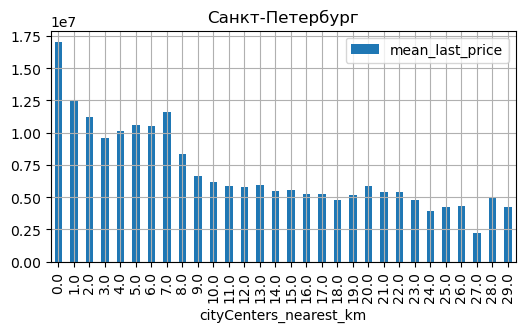

In [72]:
df_group_sp_pr = (
    df
    .query('locality_name_no_duplicates == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
)  

df_group_sp_pr.columns = ['mean_last_price']
df_group_sp_pr = df_group_sp_pr.reset_index()
print(df_group_sp_pr)
df_group_sp_pr.plot(x='cityCenters_nearest_km', y='mean_last_price', kind='bar', figsize= (6,3), 
                 title='Санкт-Петербург', grid=True)

В целом здесь прослеживается общая тенденция, что стоимость квадратного метра уменьшается при удалении от центра города. Но есть отдельные участки, где есть отличия. В районе от 3 км. до 7 км от центра города, здесь наблюдаетмся обратная зависимость. 

**Общий вывод**
Было проведено исследование объявлений о продаже квартир. Для этого были предоставлены данные архива объявлений о продаже квартир квртир в Санкт-Петербурге и соседних населенных пунктах за несколько лет (2014-2019 г).
Необходимо было установить параметры, которые влияют на рыночную стоимость квартиры, что позволит построить автоматизированную систему, позволяющую отследить аномалии и мошенническую деятельность. 

**В результате исследования проводилась оценка зависимости стоимости квартир от следующих параметров:**
1. Зависит ли стоимость квартиры от общей площади - Из рассматриваемых параметров стоимость квартиры в большей степени зависит от общей пллощади, эта зависимость практически прямая в зоне до 120 м2, затем зависимость не столь выражена, особено в области квартир с большой площадью. Коэффициент корреляции = 0.74. 
2. Зависит ли стоимость квартиры от жилой площади - Здесь наблюдается схожая картина с зависимости стоимости от общей площади, но здесь коэффициент корреляции ниже  - 0.65.  
3. Зависит ли стоимость квартиры от площади кухни - Здесь коэффициент корреляции - 0,48. Здесь также наблюдается практически прямая зависимость при размере кухни до 12-15 метров, а потом появляются разбросы. Общая зависимость - если кухня больше, стоимость выше - есть, но скорре всего она обусловлена не только данным фактором и более сложная.
4. Зависит ли стоимость квартиры от количества комнат - Зависимость между стоимостью и количеством комнат есть, но она явно не прямая, а более сложная и зависит от ряда дургих факторов. Но можно увидеть прямую зависимость при количестве комнат до 6. 
5. Зависит ли цена от типа этажа (первый, верхний, другой) - Цена зависит от этажа, наиболее дешовые квартиры на первом этаже, квартиры, которые не находяться на первом и последнем этаже стоят дороже.

 медианная стоимость первого этажа - 3990000.0 руб 
 
 меддианная стоимость верхнего этажа - 4250000.0 руб

 медианная стоимость других этажей -  4800000.0 руб 

6. Зависит ли цена от дня недели, месяца и года публикации - Стоимость квартир практически не зависит от дня и месяца публикации объявления ((максимальные коллебания медианной стоимости квартир  в зависимости от месяца около 400 000 руб, а от дня недели около 200000 руб), но есть колебаня стоимости в зависимости от кода публикации, в 2014 году медианная стоимость квартир выше, чем в другие года в период с 2014 по 2019 год.

**Была проведена оценка стоимости квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений. А также выделены города с максимальной и минимальной стоимостью в числе 10 городав с наибольшим количеством объявлений** 

- Минимальная стоимость квадратного метра составила 110129.82 р в деревне Санкт-Петербурге
- Максимальная стоимость квадратного метра составила 57875.32 р в Выборге

Распределение стоимости квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений выглядит так:

  Санкт-Петербург                 110129.823101  
  
  посёлок Мурино                   84002.068481    
 
  посёлок Шушары                   77508.487568    
  
  Всеволожск                       68377.632191    
  
  Пушкин                          101440.787093    
  
  Колпино                          75192.202044    
  
  посёлок Парголово                89866.161644   
  
  Гатчина                          68792.574426    
  
  деревня Кудрово                  92350.129513    
  
  Выборг                           57875.324270    


**Проведены исследования стоимости каждого километра в Санкт_Петербурге.**

Данные исследования показали, что прослеживается общая тенденция -  стоимость объекта уменьшается при удалении от центра города. Но есть отдельные участки, где наблюдаются отличия. В районе от 3 км. до 7 км от центра города - наблюдаетмся обратная зависимость, цена увеличивается при удалении от центра. 